In [1]:
#pip install --upgrade threadpoolctl

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)

In [3]:
data = pd.read_csv(r'C:\Users\Kingsman\Downloads\Wine_clust .csv')

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.shape

(178, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [10]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

#  scaling

In [11]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data)
#values are stored as numpy array
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
#converted to DataFrame
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


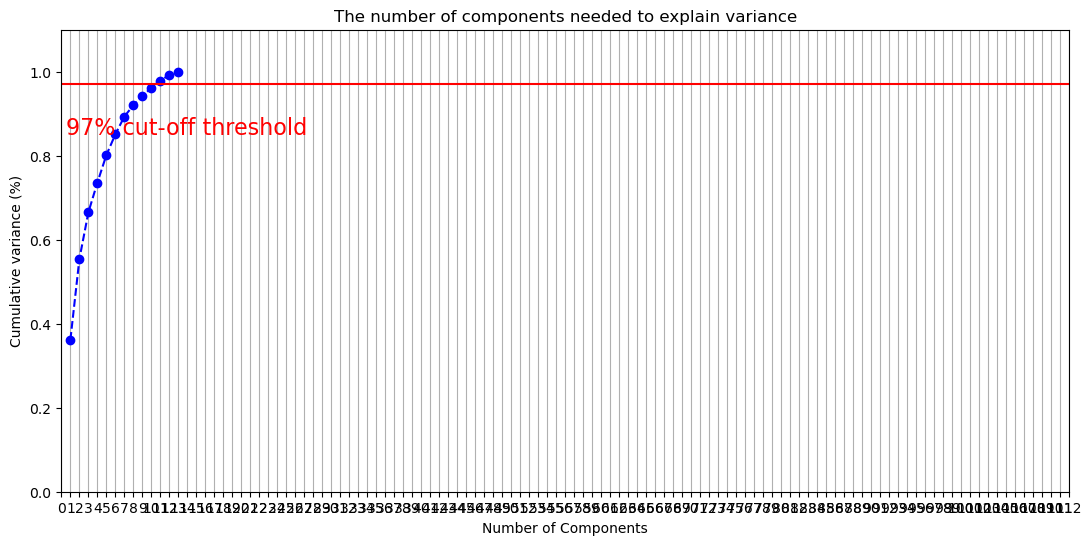

In [16]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data)

plt.rcParams["figure.figsize"] = (13,6)
# .rcParams is a dictionary-like object in matplotlib that stores the runtime configuration settings for the library
#  It provides a way to customize the behavior and appearance of matplotlib plots

fig, ax = plt.subplots()
#creates new figure and axes object
# fig: variable representing the figure
# ax: variable representing the axes on which the data is plotted

xi = np.arange(1, 14, step=1)
# creates an array xi that contains numbers from 1 to 30 (inclusive) with a step of 1
#  used as the x-values for plotting purposes

y = np.cumsum(pca.explained_variance_ratio_)
# calculates the cumulative sum of the explained variance ratio from a PCA (Principal Component Analysis) object, 
# assuming pca is a valid PCA model
# resulting values are stored in the array 'y' and are typically used as the y-values for plotting


# setting the y axis limits
plt.ylim(0.0,1.1)
# The first argument 0.0 represents the lower limit, and the second argument 1.1 represents the upper limit
# y axis ranges from 0 to 1.1

plt.plot(xi, y, marker='o', linestyle='--', color='b')
# setting plot characteristics of the graph

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 113, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='-')
# adds a horizontal line to the plot at the y-coordinate value of 0.97

plt.text(0.5, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)
# adds a text annotation to the plot at the specified coordinates
# 0.5, represents the x-coordinate of the text position, and 0.85, represents the y-coordinate

ax.grid(axis='x')
plt.show()

In [63]:
# doing PCA
pca  = PCA(n_components = 2)
df=pca.fit_transform(scaled_data)
df=pd.DataFrame(df,columns=['PCA1','PCA2'])
df.head(10)
# The no. of samples remains the same as in the original data
# The no. of features (dimensions) is reduced to 2
# representing the first 2 princiapl components

,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
5,3.050254,-2.122401
6,2.449090,-1.174850
7,2.059437,-1.608963
8,2.510874,-0.918071
9,2.753628,-0.789438


In [70]:
x = df.values

# <font color = brown> K-means Clustering

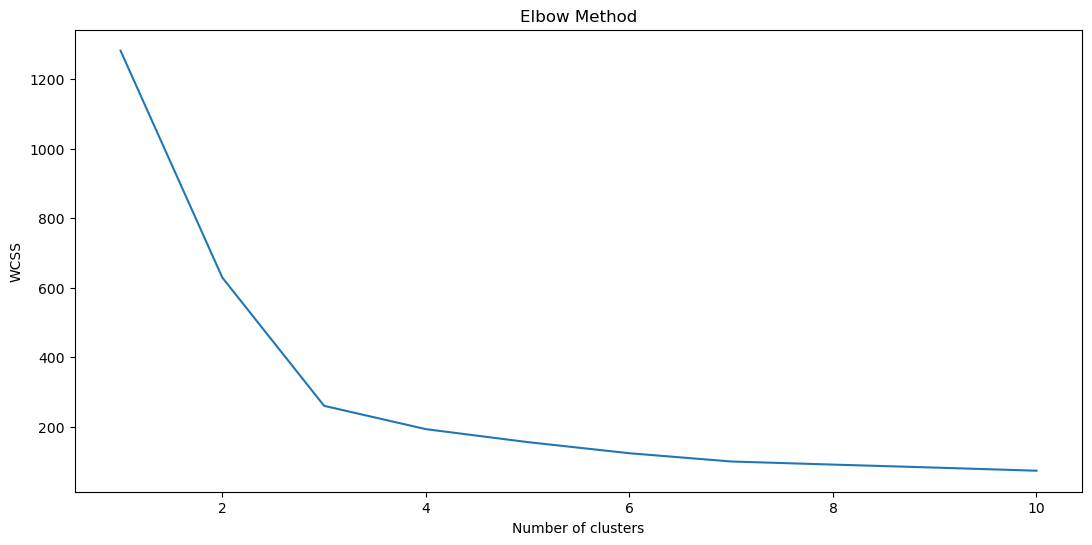

In [71]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Here from n_clusters = 3, the line in the graph has no significant drop. So we take n_clusters = 3.

In [72]:
#k-means
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(x)

#kmeans is a trained model
#y_means : array contains the cluster labels that are assigned to the training data during the 

In [73]:
# Assigning cluster to Customer type

# Get the cluster labels for each sample
labels = kmeans.labels_

# Add a new column for customer types based on cluster labels
data['Cluster'] = labels

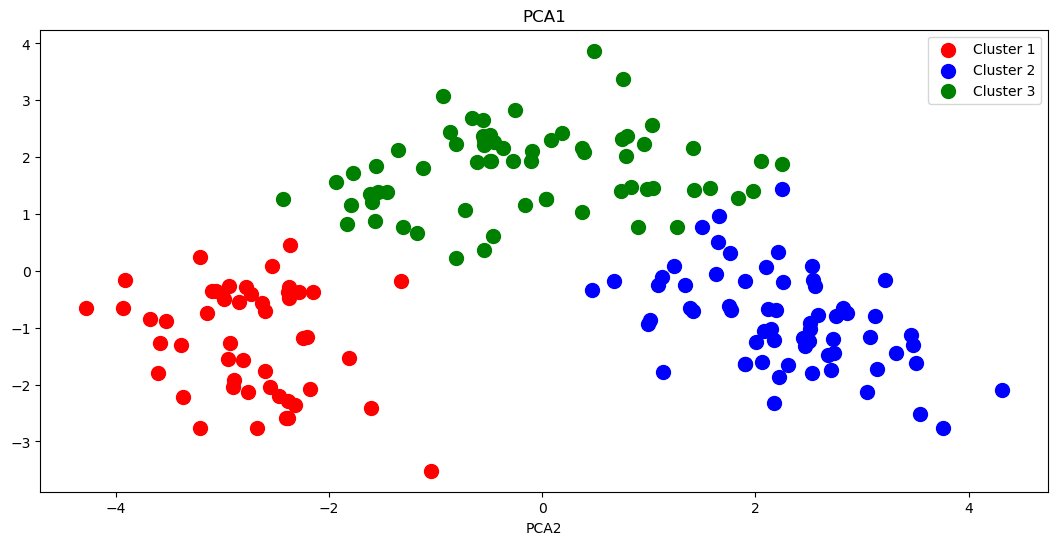

In [76]:
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(x[y_means == 3,0], x[y_means == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(x[y_means == 4,0], x[y_means == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('PCA1')
plt.xlabel('PCA2')
plt.ylabel('')
plt.legend()
plt.show()

### Evaluation metrics

In [77]:
from sklearn.metrics import silhouette_score

In [78]:
sil_avg = silhouette_score(x, y_means)
sil_avg

0.5610505693103247

# <font color = brown> Agglomerative Clustering

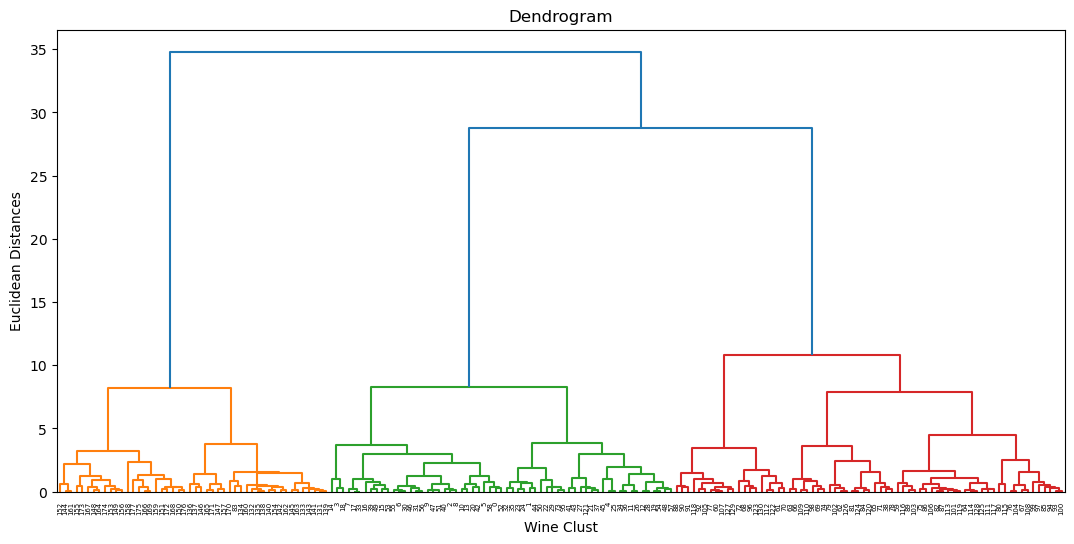

In [80]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

# the linkage method determines how the distance between clusters is calculated
# The method='ward' parameter in the sch.linkage function refers to the Ward's method of linkage
# Ward's method is based on the analysis of variance (ANOVA)
# other methods are Single linkage ('single'), Complete linkage ('complete'), Average linkage ('average'), Centroid linkage ('centroid')

plt.title('Dendrogram')
plt.xlabel('Wine Clust')
plt.ylabel('Euclidean Distances')
plt.show()

In [81]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

# n_clusters: number of clusters required
# affinity: This parameter determines the distance metric used for the linkage.
# affinity='euclidean' means Euclidean distance metric is used to measure the dissimilarity between points
# other affinity parametres are 'l1' or 'manhattan', 'l2' or 'euclidean', 'cosine', 'precomputed'

y_hc = hc.fit_predict(x)

# y_hc array contains the predicted cluster labels for each data point in x

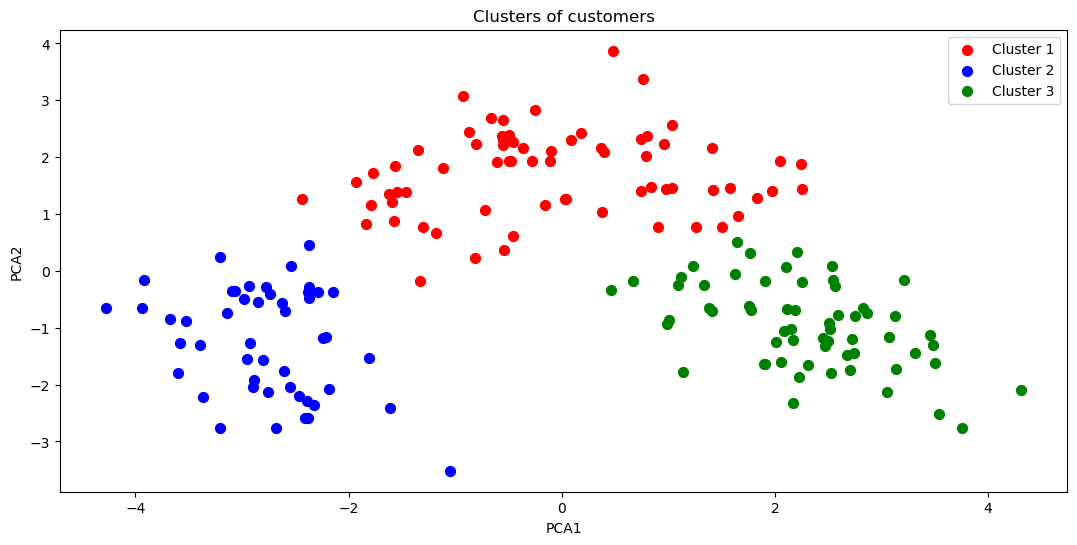

In [82]:
# Plotting data points from Cluster 1
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')

# X[y_hc == 0, 0] represents the x-coordinates of the data points in cluster 0
# X[y_hc == 0, 1] represents the y-coordinates of the data points in cluster 0

# Plotting data points from Cluster 2
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')

# Plotting data points from Cluster 3
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

# Plotting data points from Cluster 4
#plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')

# Plotting data points from Cluster 5
#plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import silhouette_score
#Silhouette score of hierarchical clustering
silhouette_avg1 = silhouette_score(x, y_hc)
print(silhouette_avg1)

0.5590883962040384


In [84]:
from sklearn.cluster import DBSCAN

In [85]:
data2=df.copy()

In [86]:
from sklearn.neighbors import NearestNeighbors #importing nearest neighbors

In [97]:
def neighbors(x):
    neighbor=NearestNeighbors(n_neighbors=5)
    nbrs=neighbor.fit(x)
    distances, index= nbrs.kneighbors(x)
    distances=np.sort(distances,axis=0)
    dist=distances[:,1]
    plt.plot(dist)
    #plt.axhline(y=0.7,color='r',linestyle='--')
    plt.show()

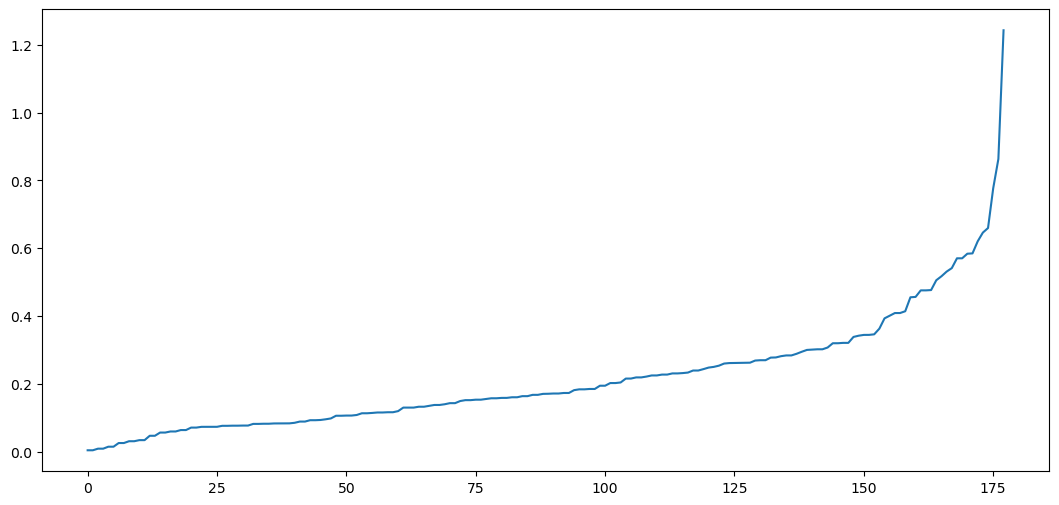

In [98]:
neighbors(x)

In [99]:
#clustering the dataset using DBSCAN
dbscan=DBSCAN(eps=0.65,min_samples=4)
y_db=dbscan.fit_predict(x)

In [100]:
data2['Cluster']=dbscan.labels_
data2.head(10)

,PCA1,PCA2,Cluster
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,-1
4,1.008908,-0.869831,0
5,3.050254,-2.122401,0
6,2.449090,-1.174850,0
7,2.059437,-1.608963,0
8,2.510874,-0.918071,0
9,2.753628,-0.789438,0


In [103]:
data2.Cluster.unique()

array([ 0, -1,  1], dtype=int64)

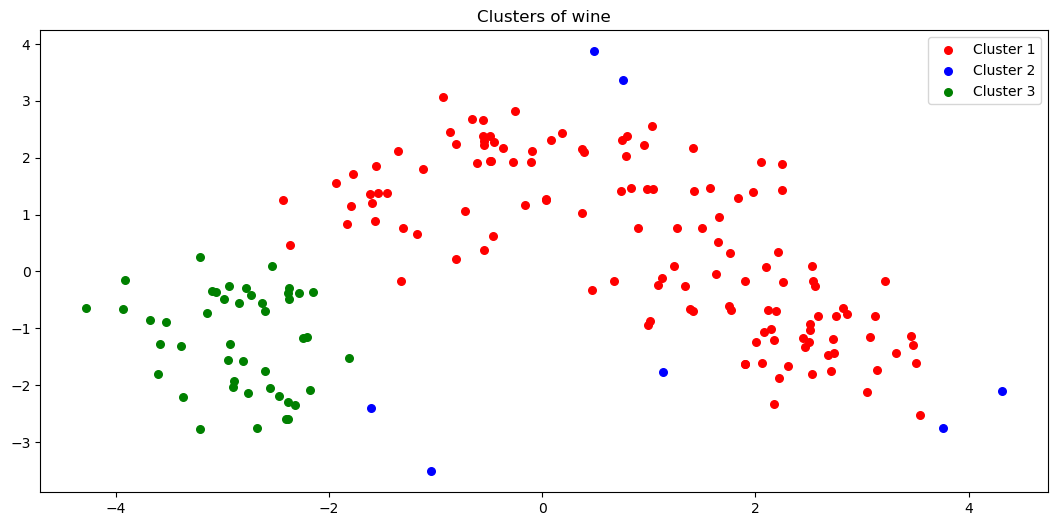

In [104]:
# Plotting data points from Cluster 1
plt.scatter(x[y_db == 0, 0], x[y_db == 0, 1], s = 30, c = 'red', label = 'Cluster 1')

# X[y_hc == 0, 0] represents the x-coordinates of the data points in cluster 0
# X[y_hc == 0, 1] represents the y-coordinates of the data points in cluster 0

# Plotting data points from Cluster 2
plt.scatter(x[y_db == -1, 0], x[y_db == -1, 1], s = 30, c = 'blue', label = 'Cluster 2')

# Plotting data points from Cluster 3
plt.scatter(x[y_db == 1, 0], x[y_db == 1, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.title('Clusters of wine')
plt.legend()
plt.show()

In [105]:
print('Silhouette score of DBSCAN =',silhouette_score(x,y_db))

Silhouette score of DBSCAN = 0.356638483690423


# k means clustering gives high silhouette score. so We can take KMeans Clustering as the most suitable model for this dataset.